<a href="https://colab.research.google.com/github/KhotNoorin/Deep-Learning-Notes/blob/main/Multi_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Layer Perceptron (MLP):


## 1. Introduction

- A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural networks.
- It consists of an input layer, one or more hidden layers, and an output layer.
- Each neuron in one layer is connected to every neuron in the next layer (fully connected).
- MLPs are used for tasks like classification, regression, and more.
- They are the fundamental architecture behind most deep learning models.

---

## 2. MLP Architecture

- **Input Layer**: Takes the feature vector as input.
- **Hidden Layers**: One or more layers that apply transformations via weights and biases.
- **Output Layer**: Produces the final prediction (class label, probability, or value).

---

## 3. Forward Propagation

The output of a neuron is computed as:

- \( z = w_1x_1 + w_2x_2 + ... + w_nx_n + b \)


Where:
- \( x_i \): Input features
- \( w_i \): Weights
- \( b \): Bias
- \( a \): Output after activation function

---

## 4. Activation Functions

- **ReLU (Rectified Linear Unit)**: \( f(x) = \max(0, x) \)
- **Sigmoid**: \( f(x) = \frac{1}{1 + e^{-x}} \)
- **Tanh**: \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \)
- **Softmax**: Converts output into class probabilities (used in multiclass classification)

---

## 5. Backpropagation

- Backpropagation is the training algorithm used in MLPs.
- It uses the chain rule to compute the gradient of the loss with respect to each weight.
- Weights are updated using gradient descent

---

## 6. Loss Functions

- **Mean Squared Error (MSE)**: For regression
- **Binary Cross-Entropy**: For binary classification
- **Categorical Cross-Entropy**: For multiclass classification

---

## 7. MLP vs Perceptron

| Feature             | Perceptron             | Multi-Layer Perceptron (MLP)   |
|---------------------|------------------------|--------------------------------|
| Layers              | Single layer           | Multiple layers                |
| Non-linearity       | No                     | Yes                            |
| Learning Rule       | Perceptron Algorithm   | Backpropagation                |
| Activation          | Step Function          | ReLU, Sigmoid, Tanh, etc.      |
| Capability          | Linear problems only   | Non-linear problems            |

---

## 8. Applications

- Handwritten digit recognition (e.g., MNIST)
- Spam and sentiment classification
- Stock price prediction
- Disease detection and diagnosis
- Image and voice recognition

---

## 9. Advantages

- Capable of learning non-linear relationships
- Can approximate any continuous function
- Versatile across various domains

---

## 10. Limitations

- Prone to overfitting if not regularized
- Requires large datasets and computational resources
- Sensitive to hyperparameters

---


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [17]:
iris = load_iris()
X = iris.data
y = iris.target

In [18]:
# One-hot encode target
y = to_categorical(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# MLP model
model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),
    Dense(12, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 247ms/step - accuracy: 0.6419 - loss: 0.9604 - val_accuracy: 0.7083 - val_loss: 0.8983
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6380 - loss: 0.9475 - val_accuracy: 0.7083 - val_loss: 0.8814
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6380 - loss: 0.9310 - val_accuracy: 0.7083 - val_loss: 0.8646
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6497 - loss: 0.9011 - val_accuracy: 0.7083 - val_loss: 0.8477
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6732 - loss: 0.8788 - val_accuracy: 0.7083 - val_loss: 0.8313
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7057 - loss: 0.8491 - val_accuracy: 0.7083 - val_loss: 0.8149
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6706 - loss: 0.8507 - val_accuracy: 0.7083 - val_loss: 0.7989
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6784 - loss: 0.8198 - val_accuracy: 0.7083 - val_loss: 0.7830

In [24]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.8333 - loss: 0.3521
Test Accuracy: 0.8333


In [25]:
import matplotlib.pyplot as plt

In [26]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)


In [27]:
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

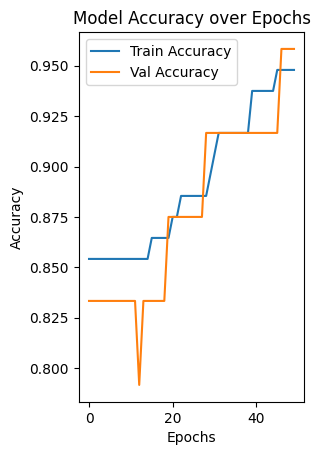

In [28]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

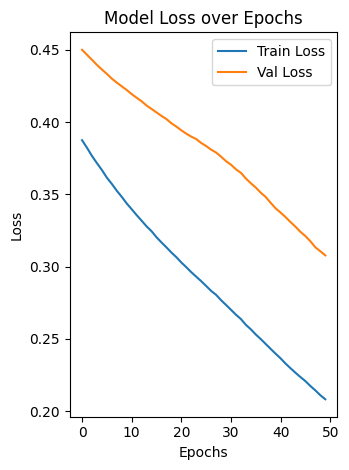

In [30]:
# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# MLP from Scratch

In [46]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
losses = []  # To store loss at each epoch

In [48]:
# Sigmoid and derivatives
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x): return x * (1 - x)

In [49]:
# Data
X, y = make_moons(n_samples=1000, noise=0.2)
y = y.reshape(-1, 1)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [50]:
# Init weights
input_dim, hidden_dim, output_dim = 2, 4, 1
w1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
w2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

In [51]:
for epoch in range(10000):
    # Forward pass
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)

    # Loss calculation
    loss = np.mean((y_train - a2) ** 2)
    losses.append(loss)

    # Backpropagation
    d2 = (a2 - y_train) * sigmoid_derivative(a2)
    dw2 = a1.T.dot(d2)
    db2 = np.sum(d2, axis=0, keepdims=True)

    d1 = d2.dot(w2.T) * sigmoid_derivative(a1)
    dw1 = X_train.T.dot(d1)
    db1 = np.sum(d1, axis=0, keepdims=True)

    # Update weights
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.2603
Epoch 1000, Loss: 0.0900
Epoch 2000, Loss: 0.0897
Epoch 3000, Loss: 0.0894
Epoch 4000, Loss: 0.0892
Epoch 5000, Loss: 0.0294
Epoch 6000, Loss: 0.0269
Epoch 7000, Loss: 0.0265
Epoch 8000, Loss: 0.0263
Epoch 9000, Loss: 0.0261


In [52]:
# Test accuracy
z1 = X_test.dot(w1) + b1
a1 = sigmoid(z1)
z2 = a1.dot(w2) + b2
a2 = sigmoid(z2)
preds = (a2 > 0.5).astype(int)
accuracy = np.mean(preds == y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9700


In [53]:
import matplotlib.pyplot as plt

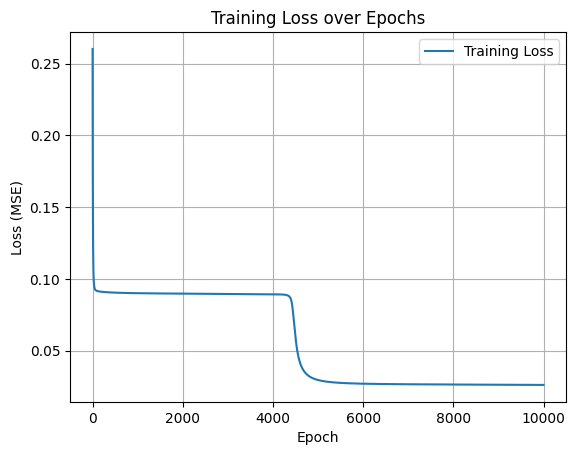

In [56]:
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.legend()
plt.grid(True)
plt.show()